### Importações

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

### Criação das combinações possíveis

Criação da lista com as combinações possíveis

In [2]:
def arranjos(n,num_ones):
    
    if num_ones > n*n:
        print("Quantidade de A maior que dimensão")
        return
    
    d = n*n
    indices_ones = list(itertools.combinations(range(d), num_ones))

    all_lists = []
    for indices in indices_ones:
        lst = np.zeros(d)
        
        for index in indices:
            lst[index] = 1
        
        all_lists.append(lst.reshape(n,n))

    return all_lists

### Código de primeiros vizinhos

Análise dos primeiros vizinhos nas posições adjacentes

In [3]:
def primeiros_vizinhos(lista,linha,coluna):
    vizinhos = []
        
    # se estiver no começo
    if linha == 0:
        vizinhos.append(lista[-1,coluna])
        vizinhos.append(lista[linha+1,coluna])
    
    if coluna == 0:
        vizinhos.append(lista[linha,-1])
        vizinhos.append(lista[linha,coluna+1])
    
    # se estiver no meio
    if linha > 0 and linha < len(lista)-1:
        vizinhos.append(lista[linha+1,coluna])
        vizinhos.append(lista[linha-1,coluna])
    
    if coluna > 0 and coluna < len(lista[0])-1:
        vizinhos.append(lista[linha,coluna+1])
        vizinhos.append(lista[linha,coluna-1])
    
    # se estiver no fim
    if linha == len(lista)-1:
        vizinhos.append(lista[0,coluna])
        vizinhos.append(lista[linha-1,coluna])
    
    if coluna == len(lista[0])-1:
        vizinhos.append(lista[linha,0])
        vizinhos.append(lista[linha,coluna-1])
    
    return vizinhos

### Cálculo do delta de energia, Z e energia livre de Helmoltz

Testes de implementação das funções

In [4]:
def delta(atual,vizinho,eaa,ebb,eab):
    
    # Para não somar duas vezes a mesma interação, lembrar de dividir por dois ao fim
    
    if atual == vizinho and atual == 1:
        return eaa
    
    if atual == vizinho and atual == 0:
        return ebb
    
    if atual != vizinho:
        return eab

In [5]:
def z(e_lista,beta):
    
    soma = 0
    for E in e_lista:
        soma += np.exp(-beta*E)
    
    return soma

In [6]:
def helmoltz(z_val,beta):
    return -beta**-1*np.log(z_val)

In [7]:
n = 3
nA = 2
nB = n - nA
eA = -1
eB = -0.8

kB = 1
T = 1

# beta = 1/kB*T

listas = arranjos(n,nA)

In [8]:
lista = listas[0]

print('Teste do algoritmo de primeiros vizinhos')
print(lista)
print()

for i in range(len(lista)):

    for j in range(len(lista[0])):

        atual = lista[i][j]
        vizinhos = primeiros_vizinhos(lista,i,j)
        print(atual,vizinhos)

Teste do algoritmo de primeiros vizinhos
[[1. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

1.0 [0.0, 0.0, 0.0, 1.0]
1.0 [0.0, 0.0, 0.0, 1.0]
0.0 [0.0, 0.0, 1.0, 1.0]
0.0 [0.0, 0.0, 0.0, 1.0]
0.0 [0.0, 1.0, 0.0, 0.0]
0.0 [0.0, 0.0, 0.0, 0.0]
0.0 [0.0, 0.0, 1.0, 0.0]
0.0 [0.0, 0.0, 1.0, 0.0]
0.0 [0.0, 0.0, 0.0, 0.0]


In [9]:
e_listas = []

for lista in listas:
    
    e_lista = []

    energia = nA*eA + nB*eB
    
    for i in range(len(lista)):    

        for j in range(len(lista[0])):

            atual = lista[i][j]
            vizinhos = primeiros_vizinhos(lista,i,j)

            delta_val = 0
            for vizinho in vizinhos:
                delta_val += delta(atual,vizinho,-0.05,-0.05,-0.05)

            energia += delta_val/2
    
    e_listas.append(energia)

In [10]:
z_val = 0

beta = 1/(kB*T)

z_val = z(e_listas,beta)
F = helmoltz(z_val,beta)

print('Helmoltz',round(F,4))

Helmoltz -7.2835


### Plot

In [47]:
def plot(ea,eb,eaa,ebb,eab,title,dim=3,qtd_pontos=9,legenda=False,save=False):
    
    kB = 1
    p_lista_A = []
    
    for n in [dim]:
        
        # p_conc = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
        # p_conc = [0,0.05,0.15,0.2,0.25,0.3,0.35,0.4,0.42,0.45,0.47,0.5,0.52,0.55,0.57,0.6,0.65,0.7,0.75,0.8,0.85,0.95,1]
        
        p_conc = np.linspace(0,1,qtd_pontos)
        
        lista_helm = []
        temp = 1
        
        for p in p_conc:

            p_lista_A.append(p)

            nA = round(n*n*p)
            nB = (n*n) - nA

            lista_temp = []

            beta = 1/(kB*T)
            listas = arranjos(n,nA)

            e_listas = []

            for lista in listas:

                energia = nA*ea + nB*eb

                for i in range(len(lista)):

                    for j in range(len(lista[0])):

                        atual = lista[i][j]
                        vizinhos = primeiros_vizinhos(lista,i,j)

                        delta_val = 0
                        for vizinho in vizinhos:
                            delta_val += delta(atual,vizinho,eaa,ebb,eab)

                        energia += delta_val/2

                e_listas.append(energia)

            z_val = z(e_listas,beta)
            F = helmoltz(z_val,beta)

            lista_helm.append(F)
        
        plt.plot(p_conc,lista_helm,label=f'Hopping={title}')
        plt.grid()
        plt.xlabel('Concentração',fontsize=12)
        plt.ylabel('Energia livre de Helmoltz',fontsize=12)
        
        plt.xlim(min(p_conc),max(p_conc))
        
        if legenda: plt.legend(loc='upper center')
        
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        plt.tight_layout()
        
        if save: plt.savefig(f'particulas-interagentes/{title}.png',dpi=300)

### Representação gráfica

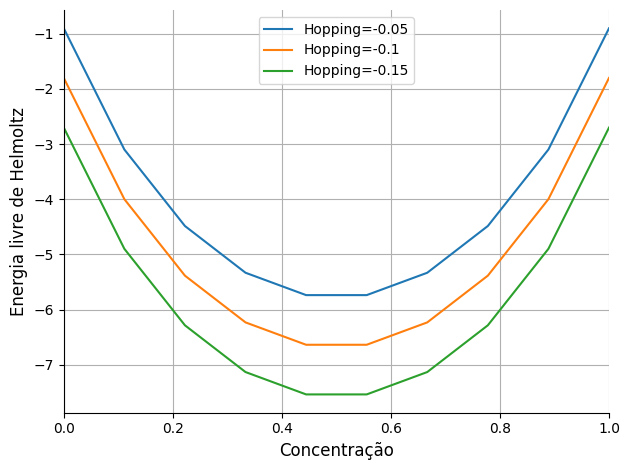

In [48]:
for hop in [-0.05,-0.1,-0.15]:
    eA=0
    eB=0
    # eAA=-0.05
    # eBB=-0.05
    # eAB=-0.05
    
    eAA = hop
    eBB = hop
    eAB = hop
    
    plot(eA,eB,eAA,eBB,eAB,str(hop),3,qtd_pontos=10,legenda=True)

# plt.savefig(f'particulas-interagentes/variando.png',dpi=300)
plt.show()

### Próxima aula

Precisamos mudar o parâmetro de hopping até encontrar o W para a célula 4x4

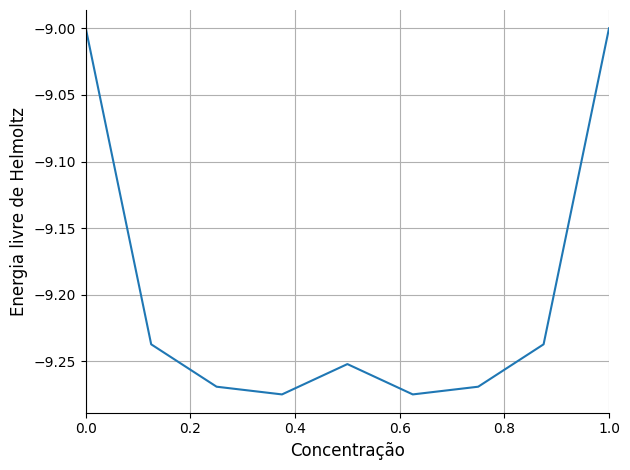

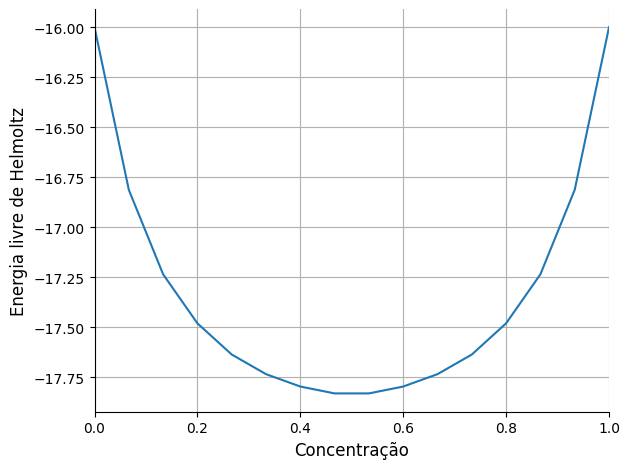

In [49]:
eA=0
eB=0

eAA = -0.5
eBB = -0.5
eAB = -0.01

plot(eA,eB,eAA,eBB,eAB,'dim=3',dim=3,save=True)
plt.show()

plot(eA,eB,eAA,eBB,eAB,'dim=4',dim=4,qtd_pontos=16,save=True)
plt.show()

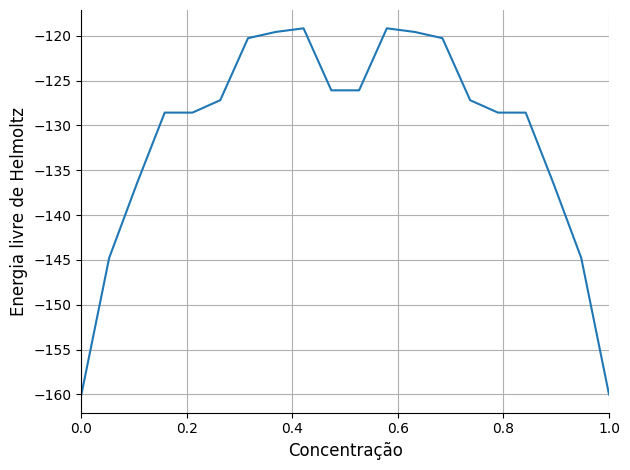

In [50]:
eAA = -5
eBB = -5
eAB = -0.5

plot(eA,eB,eAA,eBB,eAB,'hop_alto',dim=4,qtd_pontos=20)
plt.show()

# eAA = -0.1
# eBB = -0.1
# eAB = -0.075

# plot(eA,eB,eAA,eBB,eAB,'hop_dim=4',dim=4,qtd_pontos=16)
# plt.show()

#### Célula não-quadrática

In [56]:
def arranjos(n,num_ones):
    
    if num_ones > n[0]*n[1]:
        print("Quantidade de A maior que dimensão")
        return
    
    d = n[0]*n[1]
    indices_ones = list(itertools.combinations(range(d), num_ones))

    all_lists = []
    for indices in indices_ones:
        lst = np.zeros(d)
        
        for index in indices:
            lst[index] = 1
        
        all_lists.append(lst.reshape(n[0],n[1]))

    return all_lists

In [69]:
def plot(ea,eb,eaa,ebb,eab,title,dim=[3,3],qtd_pontos=9,legenda=False,save=False):
    
    kB = 1
    p_lista_A = []
    
    for n in [dim]:
        
        # p_conc = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
        # p_conc = [0,0.05,0.15,0.2,0.25,0.3,0.35,0.4,0.42,0.45,0.47,0.5,0.52,0.55,0.57,0.6,0.65,0.7,0.75,0.8,0.85,0.95,1]
        
        p_conc = np.linspace(0,1,qtd_pontos)
        
        lista_helm = []
        temp = 1
        
        for p in p_conc:

            p_lista_A.append(p)

            nA = round(n[0]*n[1]*p)
            nB = (n[0]*n[1]) - nA

            lista_temp = []

            beta = 1/(kB*T)
            listas = arranjos(n,nA)

            e_listas = []

            for lista in listas:

                energia = nA*ea + nB*eb

                for i in range(len(lista)):

                    for j in range(len(lista[0])):

                        atual = lista[i][j]
                        vizinhos = primeiros_vizinhos(lista,i,j)

                        delta_val = 0
                        for vizinho in vizinhos:
                            delta_val += delta(atual,vizinho,eaa,ebb,eab)

                        energia += delta_val/2

                e_listas.append(energia)

            z_val = z(e_listas,beta)
            F = helmoltz(z_val,beta)

            lista_helm.append(F)
        
        plt.plot(p_conc,lista_helm,label=f'Hopping={title}')
        plt.grid()
        plt.xlabel('Concentração',fontsize=12)
        plt.ylabel('Energia livre de Helmoltz',fontsize=12)
        
        plt.xlim(min(p_conc),max(p_conc))
        
        if legenda: plt.legend(loc='upper center')
        
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        plt.tight_layout()
        
        if save: plt.savefig(f'figs/particulas-interagentes/{title}.png',dpi=300)

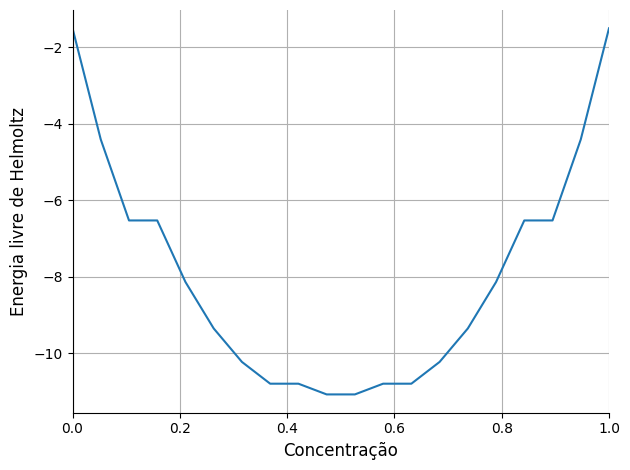

In [72]:
eA=0
eB=0

eAA = -0.05
eBB = -0.05
eAB = -0.1

plot(eA,eB,eAA,eBB,eAB,'dim=5x3',dim=[5,3],qtd_pontos=20)
plt.show()